# Logistic regression example
26/10/17

Un simple notebook pour voir comment utiliser la pipeline datasource, model et objective function.

In [1]:
import numpy as np
from xgboost import XGBRegressor
from PBP.datasources import ChunkDS
from PBP.models import LogRegModel, FrontierSelection, SKlearnWrapper, PCASelection
from PBP.objfuncs import Accuracy, Fscore

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/mrivet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
ds_train = ChunkDS(samples=5e5)
ds_train.balance_data()
ds_test = ChunkDS(skip=int(5e5), samples=1e5)
xgbModel = SKlearnWrapper(XGBRegressor(colsample_bytree=.7, subsample=.8))
model = LogRegModel(penalty='l1', C=0.0001)
accuracy = Accuracy()
fscore = Fscore()

In [30]:
pca_Logistic = PCASelection(model, fscore, tqdm=True)

In [31]:
pca_Logistic.fit(ds_train)

A Jupyter Widget

accuracy for Neural Network is : 67.129 %
fscore for Neural Network is : 48.110 %


Prediction      0      1
Reality                 
0           44678  19404
1            8898  13120

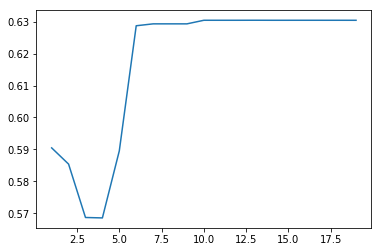

In [32]:
print("accuracy for Neural Network is : {:.3f} %"\
      .format(100 * accuracy.evaluate(pca_Logistic.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
print("fscore for Neural Network is : {:.3f} %"\
      .format(100 * fscore.evaluate(pca_Logistic.predict(ds_test),
                                      ds_test.getData().loc[:, ds_test.getLabel()])))
pca_Logistic.plot_score_curve()
accuracy.accuracy_matrix(pca_Logistic, ds_test)

The PCA does not bring anything better

In [33]:
pca_Logistic.coeff_PCA

6